## Import wymaganych bibliotek

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
from keras.models import load_model

Using TensorFlow backend.


### Funkcje programu

In [2]:
def preprocessing(classes):
    
    """
    Przetworzenie zdjęć - nadanie jednolitego rozmiaru i przedstawienie jako wartości pikseli 
    """
    
    for i in range(classes):
        path = os.path.join(cur_path,'myData',str(i))
        images = os.listdir(path)

        for a in images:
            try:
                image = Image.open(path + '\\'+ a)
                image = image.resize((30,30))
                image = np.array(image)
                data.append(image)
                labels.append(i)
            except Exception as e:
                print(e)
    
    return len(set(labels))

In [3]:
def model_accuracy(history):
    
    """
    Funkcja do wizualizacji miary dokładności modelu
    """
    
    plt.figure(0)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [4]:
def model_loss(history):
    
    """
    Funkcja do wizualizacji funkcji straty modelu
    """
    
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [5]:
def test_on_img(img):
    """
    Funkcja wczytująca zdjęcie testowe i wykonująca na nim predykcję
    """
    
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    
    return image,Y_pred

In [6]:
def testing(testcsv):
    
    """
    Funkcja do wczytania i przygotowania próbki tesowej
    """
    
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
        
    X_test=np.array(data)
    
    return X_test,label

## Parametry programu

In [7]:
# Ścieżka do katalogu projektu (wstawić własną pomiędzy apostrofami)
project_path = r'D:/.../Projekt'
os.chdir(project_path)
cur_path = os.getcwd()

# Ścieżka zapisu modelu
model_folder = './training'
model_file = file_name = 'TSR1.h5'
model_path = os.path.join(model_folder, model_file)

classes = 43 # Liczba kategorii znaków drogowych

# Dane testowe
test_folder = './Test'
test_file = 'Test.csv'

### Parametry modelu

In [8]:
test_size = 0.2 # procent danych użytych jako próba testowa
epochs = 25 # liczba epok treningu modelu 
batch_size = 20 # rozmiar paczki dancyh użytych do treningu modelu

## Trening modelu - jeśli model o danej nazwie istnieje w danym katalogu, to trening się nie wykona

Plik modelu: 'TSR1.h5' nie istnieje w podanej ścieżce.
created 43 classes 

Uczenie modelu 

Train on 8064 samples, validate on 2016 samples
Epoch 1/25
8064/8064 [==============================] - 15s 2ms/step - loss: 3.1661 - accuracy: 0.2741 - val_loss: 1.2148 - val_accuracy: 0.6716
Epoch 2/25
8064/8064 [==============================] - 14s 2ms/step - loss: 1.4026 - accuracy: 0.6101 - val_loss: 0.5842 - val_accuracy: 0.8244
Epoch 3/25
8064/8064 [==============================] - 14s 2ms/step - loss: 0.8852 - accuracy: 0.7422 - val_loss: 0.5251 - val_accuracy: 0.8641
Epoch 4/25
8064/8064 [==============================] - 14s 2ms/step - loss: 0.6961 - accuracy: 0.8010 - val_loss: 0.3242 - val_accuracy: 0.9201
Epoch 5/25
8064/8064 [==============================] - 14s 2ms/step - loss: 0.6118 - accuracy: 0.8275 - val_loss: 0.2459 - val_accuracy: 0.9375
Epoch 6/25
8064/8064 [==============================] - 14s 2ms/step - loss: 0.4827 - accuracy: 0.8617 - val_loss: 0.2031 - val_accura

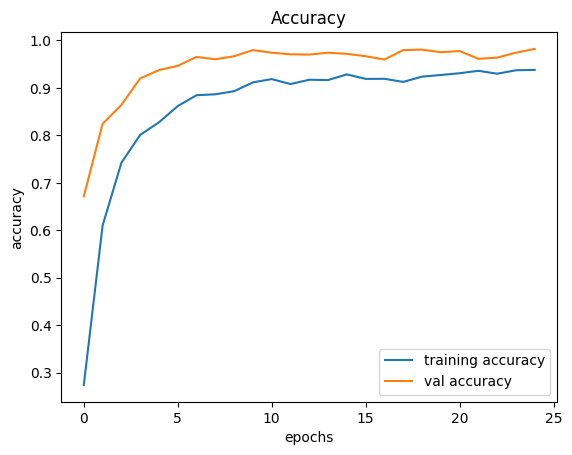

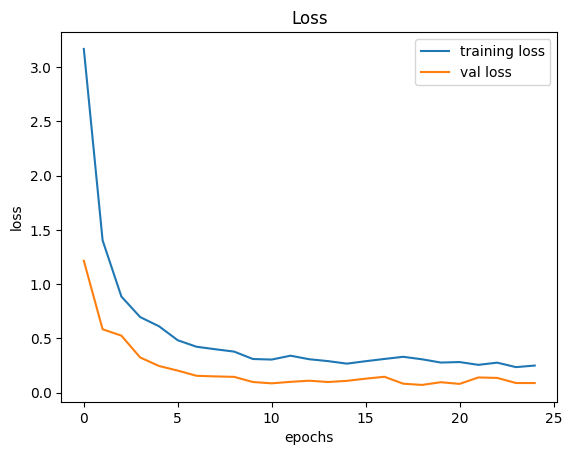

Dokładnośc modelu na próbce testowej: 0.83


In [9]:
if os.path.exists(model_path):
    print(f"Plik modelu: '{model_file}' istnieje w podanej ścieżce.")
    
    # Wczytanie modelu
    model = load_model(model_path)

    # Wczytanie zdjęcia testowego
    img_name = input("Podaj nazwę pliku testowego: ")
    img = os.path.join(test_folder, img_name)
    
    # Zdefiniowanie klas znaków
    classes = { 0: 'Ograniczenie prędkości (20km/h)',
            1: 'Ograniczenie prędkości (30km/h)', 
            2: 'Ograniczenie prędkości (50km/h)', 
            3: 'Ograniczenie prędkości (60km/h)', 
            4: 'Ograniczenie prędkości (70km/h)', 
            5: 'Ograniczenie prędkości (80km/h)', 
            6: 'Koniec ograniczenia prędkości (80km/h)', 
            7: 'Ograniczenie prędkości (100km/h)', 
            8: 'Ograniczenie prędkości (120km/h)', 
            9: 'Zakaz wyprzedzania', 
            10: 'Zakaz wyprzedzania dla pojazdów > 3.5 tony', 
            11: 'Pierwszeństwo przejazdu na skrzyżowaniu', 
            12: 'Droga z pierwszeństwem', 
            13: 'Ustąp pierwszeństwa', 
            14: 'Stop', 
            15: 'Zakaz wjazdu', 
            16: 'Zakaz wjazdu dla pojazdów > 3.5 tony', 
            17: 'Zakaz wjazdu', 
            18: 'Ogólna ostrożność', 
            19: 'Niebezpieczny zakręt w lewo', 
            20: 'Niebezpieczny zakręt w prawo', 
            21: 'Podwójny zakręt', 
            22: 'Nierówna droga', 
            23: 'Śliska droga', 
            24: 'Droga zwęża się z prawej strony', 
            25: 'Roboty drogowe', 
            26: 'Sygnalizacja świetlna', 
            27: 'Piesi', 
            28: 'Przejście dla pieszych', 
            29: 'Przejazd dla rowerów', 
            30: 'Uwaga na lód/śnieg',
            31: 'Przejście dzikich zwierząt', 
            32: 'Koniec ograniczeń prędkości + zakazu wyprzedzania', 
            33: 'Skręt w prawo', 
            34: 'Skręt w lewo', 
            35: 'Tylko prosto', 
            36: 'Prosto lub w prawo', 
            37: 'Prosto lub w lewo', 
            38: 'Skręt w prawo', 
            39: 'Skręt w lewo', 
            40: 'Obowiązkowa jazda na rondzie', 
            41: 'Koniec zakazu wyprzedzania', 
            42: 'Koniec zakazu wyprzedzania dla pojazdów > 3.5 tony' }
    
    # Predykcja kategorii znaku dla wczytanego zdjęcia
    plot,prediction = test_on_img(img)
    s = [str(i) for i in prediction] 
    a = int("".join(s)) 
    print()
    print("Znak należy do kategorii: ", classes[a])
    plt.imshow(plot)
    plt.show()
    
else:
    print(f"Plik modelu: '{model_file}' nie istnieje w podanej ścieżce.")
     
    # Zmienne do przechowywania danych, etykiet i metadanych
    data = []
    labels = []

    # Przetwarzanie zdjęć
    n_labels = preprocessing(classes)
    print(f'created {n_labels} classes \n')
    
    # Konwersja listy danych w tablicę numpy
    data = np.array(data)
    labels = np.array(labels)
    
    # Zapis danych i etykiet do pliku
    if not os.path.exists('./training'): os.mkdir('training')

    np.save('./training/data',data)
    np.save('./training/target',labels)
    
    # Podział danych na zbiór treningowy i walidacyjny
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=0)
    
    # onehot encoding - konwersja etykiet do macierzy wektorów binarnych reprezentujących poszczególne kategorie znaków
    y_train = to_categorical(y_train, classes)
    y_test = to_categorical(y_test, classes)
    
    # Architektura sieci neuronowej
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(classes, activation='softmax'))
    
    # Kompilacja modelu
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Uczenie modelu
    print('Uczenie modelu \n')
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    
    # Ocena jakości modelu - porównanie danych treningowych i walidacyjnych
    model_accuracy(history)
    model_loss(history)

    # Zapisanie modelu do pliku
    model.save(model_path)
    print(f"Zapisano plik modelu: {os.path.abspath(model_path)} \n")
    
    # Przypisanie wartośći i etykiet dla zdjęć testowych
    X_test, label = testing(os.path.join(test_folder, test_file))
    
    # Predykcja - przypisanie zdjęciom etykiet przez wytrenowany model
    Y_pred = model.predict_classes(X_test)

    print(f"Dokładnośc modelu na próbce testowej: {np.round(accuracy_score(label, Y_pred),2)}")

### Komentarz do wników treningu modelu: 
Model wraz z kolejnymi epokami wykazuje tendencję to poprawy jakości bez symptomów przeuczania modelu, czego potwierdzeniem jest porównanie metryk jakości modelu na próbie treningowej i walidacyjnej.
Wyniki modelu zależą zarówno od danych użytych do jego wytrenowania, architektury modelu (warstw, filtrów, regularyzacji, funkcji aktywacji, funkcji optymalizacyjnej), liczby epok oraz ilości danych użytych jako pakiet danych w każdym z kroków trenowania modelu

### Przykładowe porównanie jakości modelu dla zmiany jednego z warunków brzegowych - rozmiaru paczki danych (batch_size)

In [12]:
# Ścieżka zapisu modelu
model_folder = './training'
model_file = file_name = 'TSR2.h5'
model_path = os.path.join(model_folder, model_file)

classes = 43 # Liczba kategorii znaków drogowych

# Trening modelu
test_size = 0.2 # procent danych użytych jako próba testowa
epochs = 25 # liczba epok treningu modelu 
batch_size = 1000 # rozmiar paczki dancyh użytych do treningu modelu

Plik modelu: 'TSR2.h5' nie istnieje w podanej ścieżce.
created 43 classes 

Uczenie modelu 

Train on 8064 samples, validate on 2016 samples
Epoch 1/25
8064/8064 [==============================] - 10s 1ms/step - loss: 15.9982 - accuracy: 0.0329 - val_loss: 3.7475 - val_accuracy: 0.0451
Epoch 2/25
8064/8064 [==============================] - 10s 1ms/step - loss: 3.7356 - accuracy: 0.0428 - val_loss: 3.7073 - val_accuracy: 0.1071
Epoch 3/25
8064/8064 [==============================] - 10s 1ms/step - loss: 3.6728 - accuracy: 0.0698 - val_loss: 3.5591 - val_accuracy: 0.1181
Epoch 4/25
8064/8064 [==============================] - 10s 1ms/step - loss: 3.5416 - accuracy: 0.1094 - val_loss: 3.3178 - val_accuracy: 0.1756
Epoch 5/25
8064/8064 [==============================] - 10s 1ms/step - loss: 3.3530 - accuracy: 0.1581 - val_loss: 3.0354 - val_accuracy: 0.2937
Epoch 6/25
8064/8064 [==============================] - 9s 1ms/step - loss: 3.1585 - accuracy: 0.2155 - val_loss: 2.7187 - val_accura

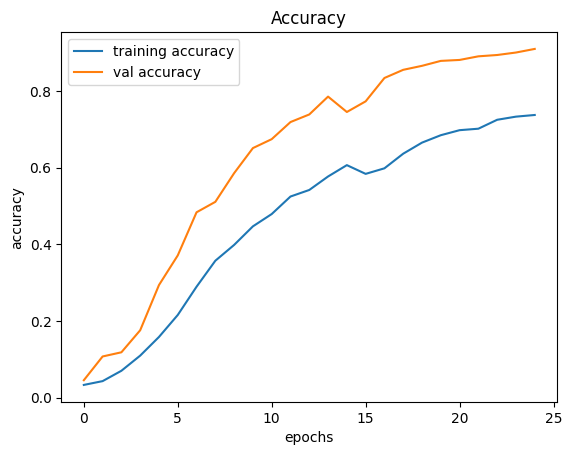

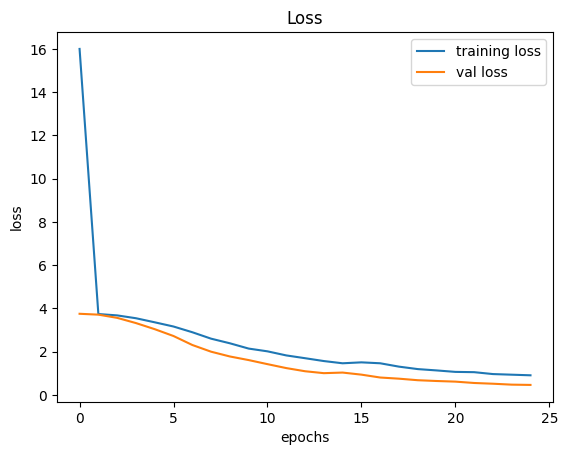

Dokładnośc modelu na próbce testowej: 0.25


In [13]:
if os.path.exists(model_path):
    print(f"Plik modelu: '{model_file}' istnieje w podanej ścieżce.")
    
    # Wczytanie modelu
    model = load_model(model_path)

    # Wczytanie zdjęcia testowego
    img_name = input("Podaj nazwę pliku testowego: ")
    img = os.path.join(test_folder, img_name)
    
    # Zdefiniowanie klas znaków
    classes = { 0: 'Ograniczenie prędkości (20km/h)',
            1: 'Ograniczenie prędkości (30km/h)', 
            2: 'Ograniczenie prędkości (50km/h)', 
            3: 'Ograniczenie prędkości (60km/h)', 
            4: 'Ograniczenie prędkości (70km/h)', 
            5: 'Ograniczenie prędkości (80km/h)', 
            6: 'Koniec ograniczenia prędkości (80km/h)', 
            7: 'Ograniczenie prędkości (100km/h)', 
            8: 'Ograniczenie prędkości (120km/h)', 
            9: 'Zakaz wyprzedzania', 
            10: 'Zakaz wyprzedzania dla pojazdów > 3.5 tony', 
            11: 'Pierwszeństwo przejazdu na skrzyżowaniu', 
            12: 'Droga z pierwszeństwem', 
            13: 'Ustąp pierwszeństwa', 
            14: 'Stop', 
            15: 'Zakaz wjazdu', 
            16: 'Zakaz wjazdu dla pojazdów > 3.5 tony', 
            17: 'Zakaz wjazdu', 
            18: 'Ogólna ostrożność', 
            19: 'Niebezpieczny zakręt w lewo', 
            20: 'Niebezpieczny zakręt w prawo', 
            21: 'Podwójny zakręt', 
            22: 'Nierówna droga', 
            23: 'Śliska droga', 
            24: 'Droga zwęża się z prawej strony', 
            25: 'Roboty drogowe', 
            26: 'Sygnalizacja świetlna', 
            27: 'Piesi', 
            28: 'Przejście dla pieszych', 
            29: 'Przejazd dla rowerów', 
            30: 'Uwaga na lód/śnieg',
            31: 'Przejście dzikich zwierząt', 
            32: 'Koniec ograniczeń prędkości + zakazu wyprzedzania', 
            33: 'Skręt w prawo', 
            34: 'Skręt w lewo', 
            35: 'Tylko prosto', 
            36: 'Prosto lub w prawo', 
            37: 'Prosto lub w lewo', 
            38: 'Skręt w prawo', 
            39: 'Skręt w lewo', 
            40: 'Obowiązkowa jazda na rondzie', 
            41: 'Koniec zakazu wyprzedzania', 
            42: 'Koniec zakazu wyprzedzania dla pojazdów > 3.5 tony' }
    
    # Predykcja kategorii znaku dla wczytanego zdjęcia
    plot,prediction = test_on_img(img)
    s = [str(i) for i in prediction] 
    a = int("".join(s)) 
    print()
    print("Znak należy do kategorii: ", classes[a])
    plt.imshow(plot)
    plt.show()
    
else:
    print(f"Plik modelu: '{model_file}' nie istnieje w podanej ścieżce.")
     
    # Zmienne do przechowywania danych, etykiet i metadanych
    data = []
    labels = []

    # Przetwarzanie zdjęć
    n_labels = preprocessing(classes)
    print(f'created {n_labels} classes \n')
    
    # Konwersja listy danych w tablicę numpy
    data = np.array(data)
    labels = np.array(labels)
    
    # Zapis danych i etykiet do pliku
    if not os.path.exists('./training'): os.mkdir('training')

    np.save('./training/data',data)
    np.save('./training/target',labels)
    
    # Podział danych na zbiór treningowy i walidacyjny
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=0)
    
    # onehot encoding - konwersja etykiet do macierzy wektorów binarnych reprezentujących poszczególne kategorie znaków
    y_train = to_categorical(y_train, classes)
    y_test = to_categorical(y_test, classes)
    
    # Architektura sieci neuronowej
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(classes, activation='softmax'))
    
    # Kompilacja modelu
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Uczenie modelu
    print('Uczenie modelu \n')
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    
    # Ocena jakości modelu - porównanie danych treningowych i walidacyjnych
    model_accuracy(history)
    model_loss(history)

    # Zapisanie modelu do pliku
    model.save(model_path)
    print(f"Zapisano plik modelu: {os.path.abspath(model_path)} \n")
    
    # Przypisanie wartośći i etykiet dla zdjęć testowych
    X_test, label = testing(os.path.join(test_folder, test_file))
    
    # Predykcja - przypisanie zdjęciom etykiet przez wytrenowany model
    Y_pred = model.predict_classes(X_test)

    print(f"Dokładnośc modelu na próbce testowej: {np.round(accuracy_score(label, Y_pred),2)}")

### Komentarz: 
Zwiększenie rozmiaru paczki danych pogorszyło wyniki ponieważ ma to wpływ na częstość aktualizacji parametrów modelu przy każdej iteracji -> im większa paczka danych użyta w każdej iteracji podczas uczenia modelu, tym rzadziej są aktualizowane parametry modelu i większe prawdopodobieństwo, że algorytm optymalizacyjny utknie w lokalnym minimum lub będzie uczył się wolniej niż przy mniejszym rozmiarze paczki danych

##### Model 1 z batch_size=20 ma accuracy=0.83, a model 2 z batch_size=1000 ma accuracy=0.25

### Przykładowa predykcja na wytrenowanym modelu na wskazanym zdjęciu

In [14]:
model_file = 'TSR1.h5'
model_path = os.path.join(model_folder, model_file)

Plik modelu: 'TSR1.h5' istnieje w podanej ścieżce.


Podaj nazwę pliku testowego:  00000.png



Znak należy do kategorii:  Zakaz wjazdu dla pojazdów > 3.5 tony


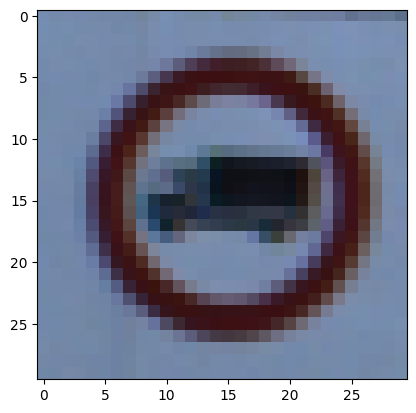

In [16]:
if os.path.exists(model_path):
    print(f"Plik modelu: '{model_file}' istnieje w podanej ścieżce.")
    
    # Wczytanie modelu
    model = load_model(model_path)

    # Wczytanie zdjęcia testowego
    img_name = input("Podaj nazwę pliku testowego: ")
    img = os.path.join(test_folder, img_name)
    
    # Zdefiniowanie klas znaków
    classes = { 0: 'Ograniczenie prędkości (20km/h)',
            1: 'Ograniczenie prędkości (30km/h)', 
            2: 'Ograniczenie prędkości (50km/h)', 
            3: 'Ograniczenie prędkości (60km/h)', 
            4: 'Ograniczenie prędkości (70km/h)', 
            5: 'Ograniczenie prędkości (80km/h)', 
            6: 'Koniec ograniczenia prędkości (80km/h)', 
            7: 'Ograniczenie prędkości (100km/h)', 
            8: 'Ograniczenie prędkości (120km/h)', 
            9: 'Zakaz wyprzedzania', 
            10: 'Zakaz wyprzedzania dla pojazdów > 3.5 tony', 
            11: 'Pierwszeństwo przejazdu na skrzyżowaniu', 
            12: 'Droga z pierwszeństwem', 
            13: 'Ustąp pierwszeństwa', 
            14: 'Stop', 
            15: 'Zakaz wjazdu', 
            16: 'Zakaz wjazdu dla pojazdów > 3.5 tony', 
            17: 'Zakaz wjazdu', 
            18: 'Ogólna ostrożność', 
            19: 'Niebezpieczny zakręt w lewo', 
            20: 'Niebezpieczny zakręt w prawo', 
            21: 'Podwójny zakręt', 
            22: 'Nierówna droga', 
            23: 'Śliska droga', 
            24: 'Droga zwęża się z prawej strony', 
            25: 'Roboty drogowe', 
            26: 'Sygnalizacja świetlna', 
            27: 'Piesi', 
            28: 'Przejście dla pieszych', 
            29: 'Przejazd dla rowerów', 
            30: 'Uwaga na lód/śnieg',
            31: 'Przejście dzikich zwierząt', 
            32: 'Koniec ograniczeń prędkości + zakazu wyprzedzania', 
            33: 'Skręt w prawo', 
            34: 'Skręt w lewo', 
            35: 'Tylko prosto', 
            36: 'Prosto lub w prawo', 
            37: 'Prosto lub w lewo', 
            38: 'Skręt w prawo', 
            39: 'Skręt w lewo', 
            40: 'Obowiązkowa jazda na rondzie', 
            41: 'Koniec zakazu wyprzedzania', 
            42: 'Koniec zakazu wyprzedzania dla pojazdów > 3.5 tony' }
    
    # Predykcja kategorii znaku dla wczytanego zdjęcia
    plot,prediction = test_on_img(img)
    s = [str(i) for i in prediction] 
    a = int("".join(s)) 
    print()
    print("Znak należy do kategorii: ", classes[a])
    plt.imshow(plot)
    plt.show()
    
else:
    print(f"Plik modelu: '{model_file}' nie istnieje w podanej ścieżce.")
     
    # Zmienne do przechowywania danych, etykiet i metadanych
    data = []
    labels = []

    # Przetwarzanie zdjęć
    n_labels = preprocessing(classes)
    print(f'created {n_labels} classes \n')
    
    # Konwersja listy danych w tablicę numpy
    data = np.array(data)
    labels = np.array(labels)
    
    # Zapis danych i etykiet do pliku
    if not os.path.exists('./training'): os.mkdir('training')

    np.save('./training/data',data)
    np.save('./training/target',labels)
    
    # Podział danych na zbiór treningowy i walidacyjny
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=0)
    
    # onehot encoding - konwersja etykiet do macierzy wektorów binarnych reprezentujących poszczególne kategorie znaków
    y_train = to_categorical(y_train, classes)
    y_test = to_categorical(y_test, classes)
    
    # Architektura sieci neuronowej
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(classes, activation='softmax'))
    
    # Kompilacja modelu
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Uczenie modelu
    print('Uczenie modelu \n')
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    
    # Ocena jakości modelu - porównanie danych treningowych i walidacyjnych
    model_accuracy(history)
    model_loss(history)

    # Zapisanie modelu do pliku
    model.save(model_path)
    print(f"Zapisano plik modelu: {os.path.abspath(model_path)} \n")
    
    # Przypisanie wartośći i etykiet dla zdjęć testowych
    X_test, label = testing(os.path.join(test_folder, test_file))
    
    # Predykcja - przypisanie zdjęciom etykiet przez wytrenowany model
    Y_pred = model.predict_classes(X_test)

    print(f"Dokładnośc modelu na próbce testowej: {np.round(accuracy_score(label, Y_pred),2)}")